## Aiman Alam
## Text Analysis and NLP Project 
## 17/05/2023
## Emotion Detection for Text Analysis in the Mental Health Field

# Importing libraries

In [52]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow.keras.utils as tu


#nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()


# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Accessing the datasets

In [2]:
# Read datasets
df_train = pd.read_csv('C:\\Users\\aiman\\Downloads\\archive (5)\\train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('C:\\Users\\aiman\\Downloads\\archive (5)\\test.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('C:\\Users\\aiman\\Downloads\\archive (5)\\val.txt', names=['Text', 'Emotion'], sep=';')

In [3]:
#print first 5 rows
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
#Shape of the data set
df_train.shape

(16000, 2)

In [5]:
#print first 5 rows
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
#print the shape of the data set
df_test.shape

(2000, 2)

In [7]:
#print first 5 rows
df_val.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
#print the shape of the data set
df_val.shape

(2000, 2)

# Exploratory Data Analysis

## Train dataset

In [9]:
#check if the data is balanced or not
df_train['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [10]:
#check if the data is balanced or not
df_train['Emotion'].value_counts() / df_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: Emotion, dtype: float64

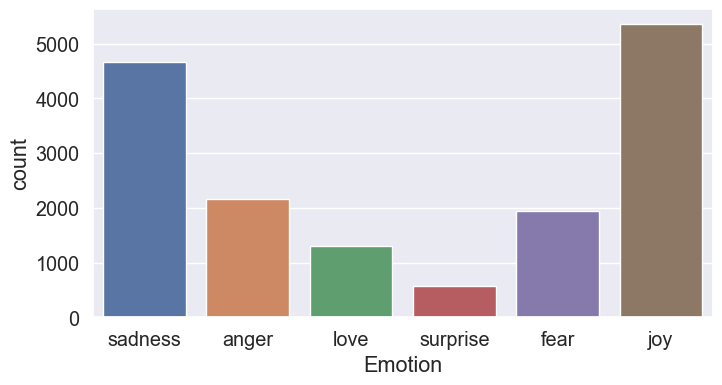

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_train);

The data is imbalanced so, we may try to balance it but also, the emotions that we interested in are the most repeated emotion so, till now we can keep the data as it is

In [12]:
#print the number of null values in each column
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

The data doesn't contains any null values

In [13]:
#print the number of duplicated values 
df_train.duplicated().sum()

1

In [14]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


### Wordcloud

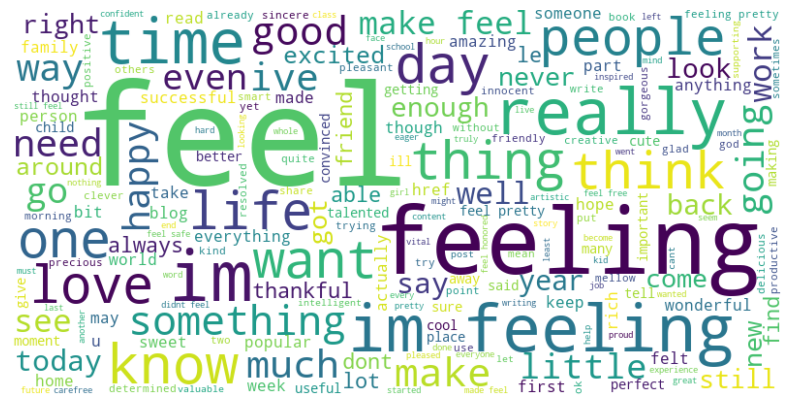

In [53]:
# Concatenate all text data for a specific emotion (e.g., "joy")
text = " ".join(df_train[df_train['Emotion'] == 'joy']['Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

5     1418
7     1410
6     1397
4     1344
8     1321
3     1267
9     1180
10    1050
2      923
11     890
12     752
13     644
14     493
1      451
15     376
16     266
17     238
18     165
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: stop_words, dtype: int64

The data contains alot of stopwords (some rows contains more than 25 stopword!) so, we need to take care when we remove them as some rows may become empty. 

<AxesSubplot:ylabel='Frequency'>

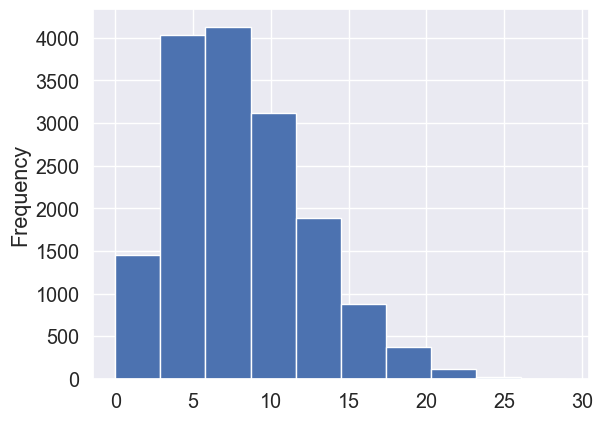

In [16]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')


## Test dataset

In [17]:
#check if the data is balanced or not
df_test.Emotion.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

In [142]:
#check if the data is balanced or not
df_test['Emotion'].value_counts() / df_test.shape[0] *100

joy         34.75
sadness     29.05
anger       13.75
fear        11.20
love         7.95
surprise     3.30
Name: Emotion, dtype: float64

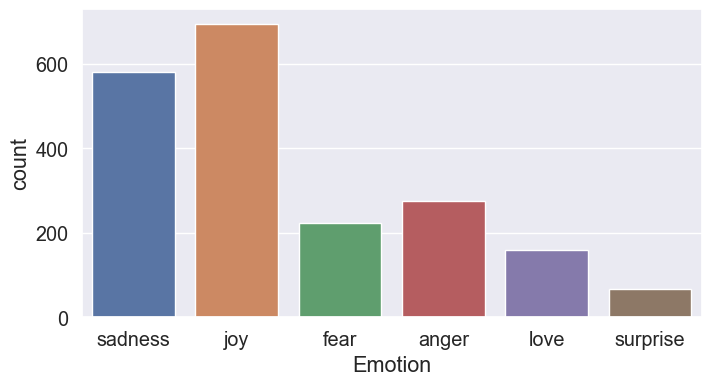

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_test);



In [19]:
#print the number of null values in each column
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [20]:
#print the number of duplicated values 
df_test.duplicated().sum()

0

In [138]:

#print the rows which are duplicated
df_test[df_test['Text'].duplicated() == True]



,Text,Emotion
1587,feel ashamed,sadness


In [22]:
#Count the number of stopwords in the data
temp =df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()


7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: stop_words, dtype: int64

<AxesSubplot:ylabel='Frequency'>

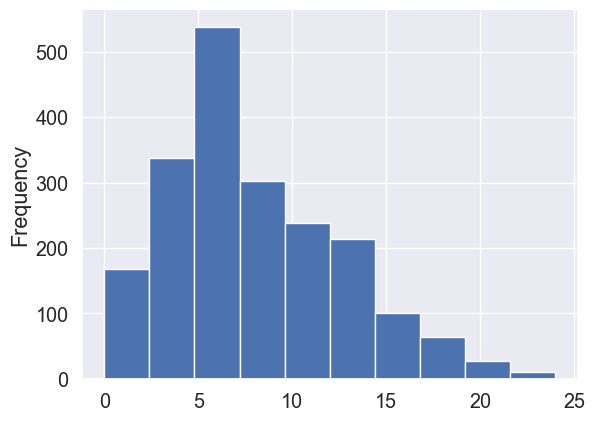

In [23]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

### Wordcloud

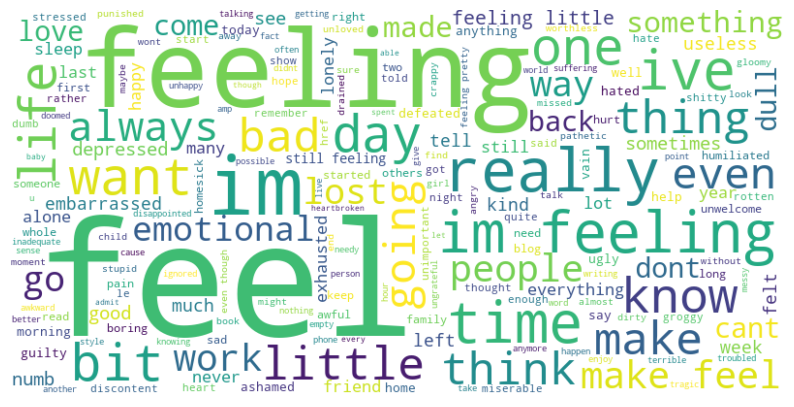

In [55]:
# Concatenate all text data for a specific emotion (e.g., "Sadness")
text = " ".join(df_test[df_test['Emotion'] == 'sadness']['Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Validation dataset

In [24]:
#check if the data is balanced or not
df_val.Emotion.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

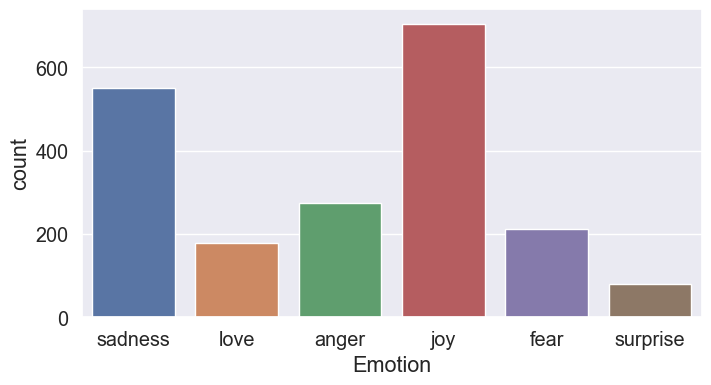

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_val);

In [26]:
#print the number of null values in each column
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [27]:
#print the number of duplicated values 
df_val.duplicated().sum()

0

In [28]:
#print the rows which are duplicated
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [29]:
#removing duplicated text
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [30]:
#Count the number of stopwords in the data
temp =df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()[:10]


7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
Name: stop_words, dtype: int64

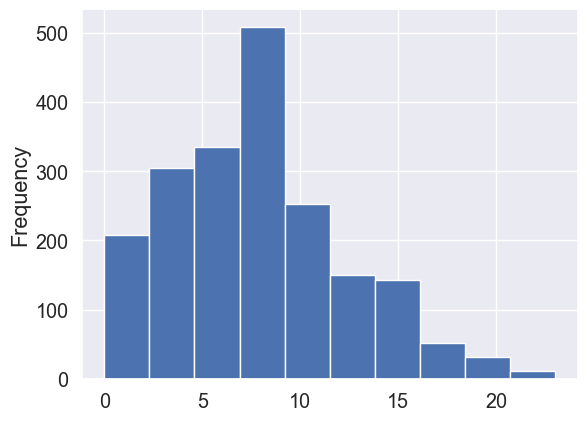

In [31]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist');

### Wordcloud

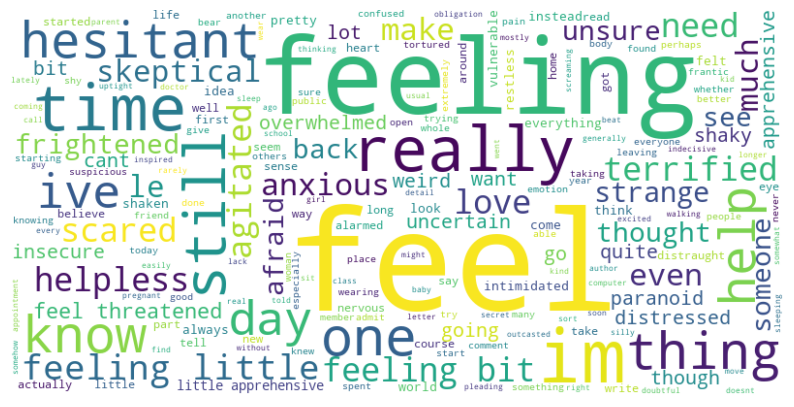

In [76]:
# Concatenate all text data for a specific emotion (e.g., "Fear")
text = " ".join(df_val[df_val['Emotion'] == 'fear']['Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Cleaning and Preprocessing of Datasets

In [32]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

    

In [80]:
normalized_sentence("HelLÖ WorLd, @--THIS iS AImaN'##")


'hellö world this aiman'

In [34]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

# Modeling

### TF-IDF
The word counts suffer some issues: most frequent words are usually not important (like stop words), while they take high focus/count.

TFIDF (Term Frequency - Inverse Document) is a way to adjust those count. TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical representation technique commonly used in natural language processing (NLP) to assess the importance of a term in a document or a corpus.

TF: mentions within a document.

IDF: mentions across all documents. 

The formula for calculating TF-IDF for a term in a document is:

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
The resulting score represents the relative importance of the term in the document and the entire corpus.

We will start by baseline models.

## **Creating a pipline using TF-IDF for words embedding and different models.**


In [92]:
#Preprocess text

X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

In [93]:
def train_model(model, data, targets):
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [94]:
def get_F1(trained_model,X,y):
    
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    
    # Return the F1 score
    return f1

## **Training the Logistic Regression model on the Training set**


In [95]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [96]:
#Make a single prediction
y_pred=log_reg.predict(['Happy'])
y_pred

array(['joy'], dtype=object)

In [98]:
#test the model with the test data
y_pred_LR =log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_LR)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.869 



,F1 score
sadness,0.860902
anger,0.825776
love,0.892452
surprise,0.698885
fear,0.917230
joy,0.626263


In [100]:
##Classification Report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.89      0.77      0.83       224
         joy       0.83      0.96      0.89       695
        love       0.85      0.59      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.47      0.63        66

    accuracy                           0.87      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



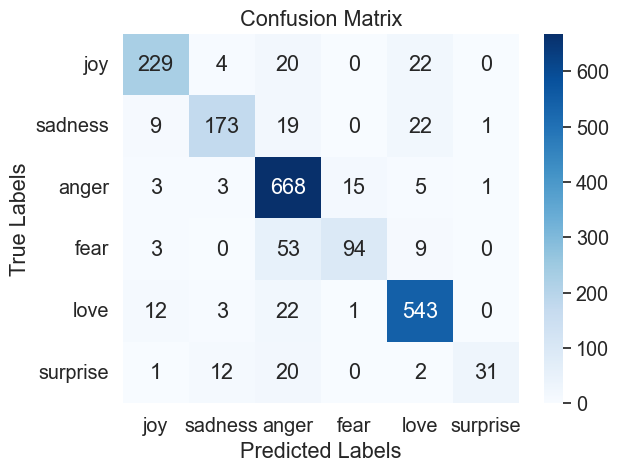

In [101]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_LR)

# Create a list of class labels (e.g., emotion categories)
class_labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

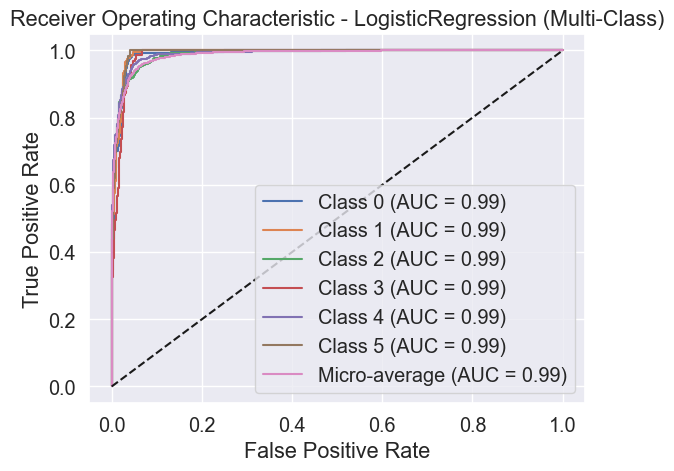

Accuracy: 0.869
F1 score: 0.8035844326877714


In [131]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute probabilities for each class using predict_proba
y_probs_LR = log_reg.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_LR[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_probs_LR.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LogisticRegression (Multi-Class)')
plt.legend()
plt.show()


# Predict classes for the test set
y_pred_LR = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_LR)
print('Accuracy:', log_reg_accuracy)

# Calculate F1 score
f1_score_LR = f1_score(y_test, y_pred_LR, average='macro')
print('F1 score:', f1_score_LR)


## **Training the Decision Tree model on the Training set**

In [129]:
#Train the model with the training data
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred_DT =DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred_DT)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(DT,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 

Accuracy:  0.856 



,F1 score
sadness,0.868327
anger,0.813187
love,0.884866
surprise,0.743902
fear,0.892576
joy,0.604651


In [106]:
##Classification Report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

       anger       0.85      0.89      0.87       275
        fear       0.80      0.83      0.81       224
         joy       0.89      0.88      0.88       695
        love       0.72      0.77      0.74       159
     sadness       0.91      0.88      0.89       581
    surprise       0.62      0.59      0.60        66

    accuracy                           0.86      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.86      0.86      0.86      2000



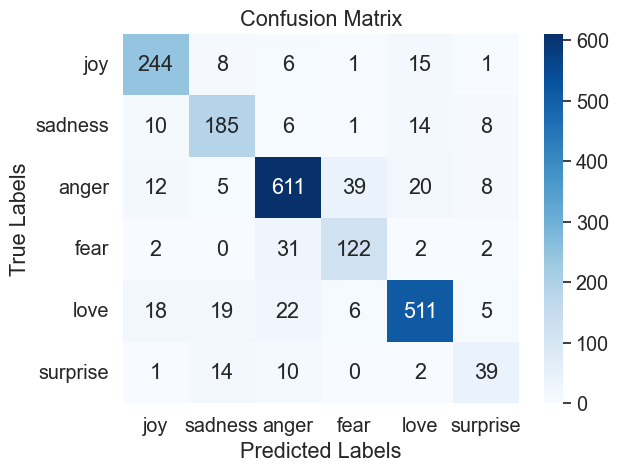

In [107]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)

# Create a list of class labels (e.g., emotion categories)
class_labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

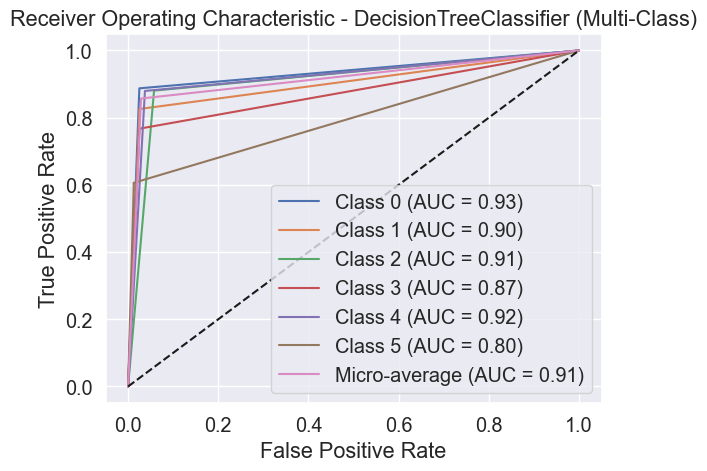

In [132]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute probabilities for each class using predict_proba
y_probs_DT = DT.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_DT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_probs_DT.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - DecisionTreeClassifier (Multi-Class)')
plt.legend()
plt.show()


## **Training the Support Vector Machine model on the Training set**


In [110]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred_SVM =SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred_SVM)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(SVM,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 


Accuracy:  0.868 



,F1 score
sadness,0.857685
anger,0.827907
love,0.894244
surprise,0.684015
fear,0.914821
joy,0.660377


In [111]:
##Classification Report
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.86      0.79      0.83       224
         joy       0.84      0.96      0.89       695
        love       0.84      0.58      0.68       159
     sadness       0.91      0.92      0.91       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



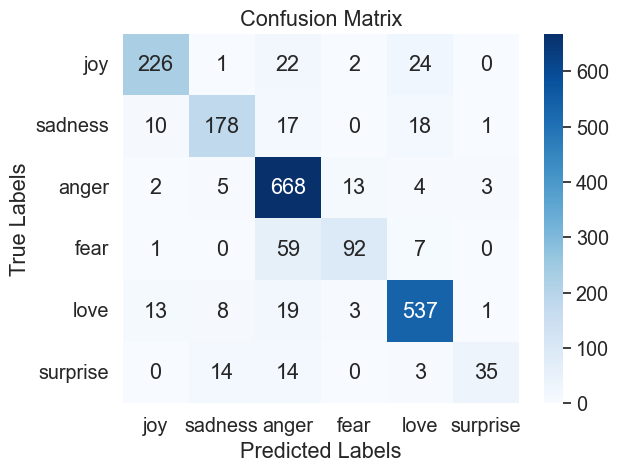

In [112]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM)

# Create a list of class labels (e.g., emotion categories)
class_labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

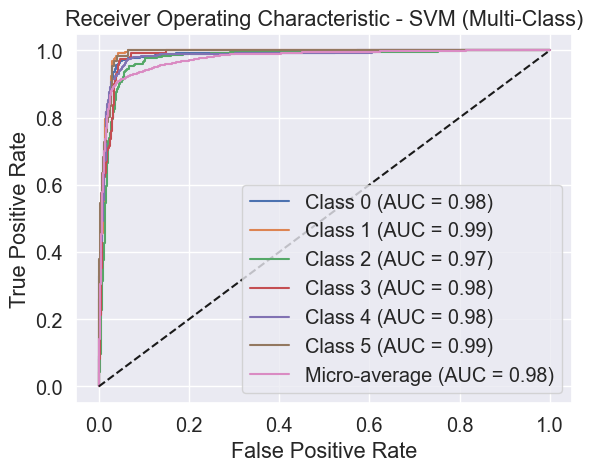

In [121]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute probabilities for each class using decision_function
y_scores_SVM = SVM.decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores_SVM[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores_SVM.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM (Multi-Class)')
plt.legend()
plt.show()


## **Training the Random Forest model on the Training set**

In [113]:
#Train the model with the training data
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred_RF =RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 

Accuracy:  0.8905 



,F1 score
sadness,0.901460
anger,0.872807
love,0.909601
surprise,0.748299
fear,0.934726
joy,0.619048


In [114]:
##Classification Report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

       anger       0.90      0.90      0.90       275
        fear       0.86      0.89      0.87       224
         joy       0.89      0.93      0.91       695
        love       0.81      0.69      0.75       159
     sadness       0.95      0.92      0.93       581
    surprise       0.65      0.59      0.62        66

    accuracy                           0.89      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



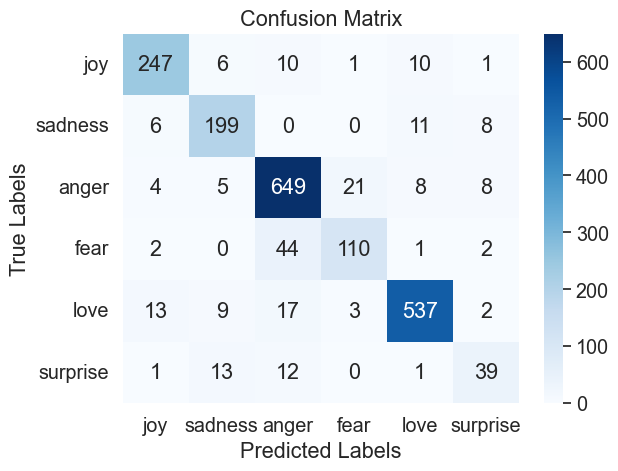

In [115]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Create a list of class labels (e.g., emotion categories)
class_labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()

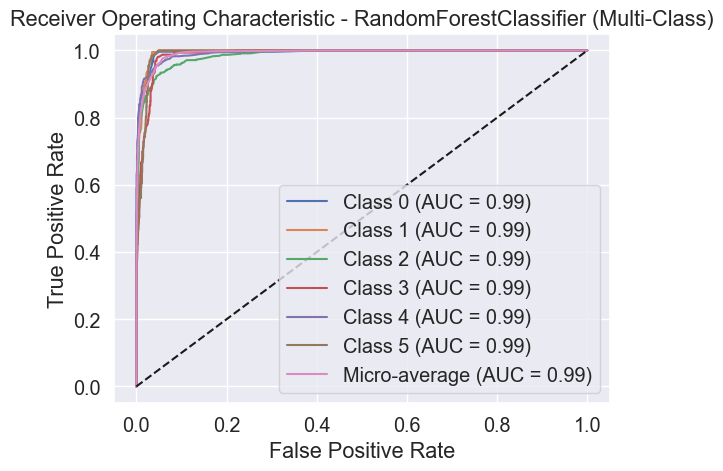

In [120]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute probabilities for each class using predict_proba
y_probs_RF = RF.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_RF[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_probs_RF.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForestClassifier (Multi-Class)')
plt.legend()
plt.show()


The curve starts from (0.0, 0.0), indicating a false positive rate and true positive rate of zero. As the curve progresses, it moves towards the upper left corner of the plot, representing increasing true positive rate values while keeping the false positive rate low.

At some point, the curve reaches (1.0, 1.0) on the y-axis, indicating perfect classification performance, where the true positive rate is maximized while the false positive rate remains at zero. From there, the curve proceeds horizontally towards 1.0 on the x-axis, suggesting that as the classifier tries to improve its true positive rate, the false positive rate also increases.

Overall, this observation suggests that the Random Forest classifier performs well in terms of true positive rates initially, but as it becomes more aggressive in classifying positive instances, it also starts classifying more false positives.Similar obsrvations has been made for SVM and Logistic Regression.

# Results

In [116]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.89
1,Logistic Regression,0.87
2,Support Vector Machine,0.87
3,Decision Tree,0.86
